In [1]:
from mpgm.mpgm.evaluation.generating_samples import *
from mpgm.mpgm.models.SPGM import SPGM
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
nr_variables = 10
nr_samples = 150
SPW = SampleParamsWrapper(nr_variables=nr_variables,
                          sample_init=np.zeros((nr_variables,)),
                          nr_samples=nr_samples,
                          random_seed=1)

In [3]:
SPW.graph_generator = LatticeGraphGenerator(sparsity_level=0)
SPW.model = SPGM(R=10, R0=5)
SPW.sampler = SIPRVSampler(lambda_true=1, lambda_noise=0.5)
SPW.weight_assigner = Dummy_Weight_Assigner()
SPW.generate_samples_and_save("SPGM_test_samples", "samples.sqlite")

Generated samples: SPGM_test_samples


In [4]:
SPS = SampleParamsWrapper.load_samples("SPGM_test_samples", "samples.sqlite")
samples = SPS.samples

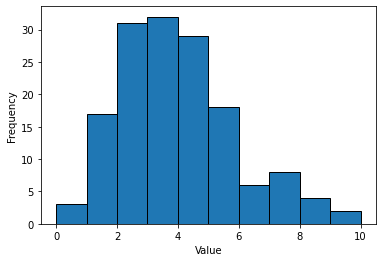

In [6]:
plt.hist(samples[:, 0], bins=range(11), ec="k")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('histogram_SIPRV.png')

In [7]:
def time_generate_samples(mode:str, wa:Weight_Assigner):
    gg = LatticeGraphGenerator()
    np.random.seed(0)
    
    G = gg.generate_graph(nr_variables=10)
    wa.assign_weights(G)
    
    if mode == "TPGM":
        model = TPGM(R=10, theta=G)
        sampler = TPGMGibbsSampler(burn_in=50, thinning_nr=150)
    elif mode == "SPGM":
        model = SPGM(R=10, R0=5, theta=G)
        sampler = SPGMGibbsSampler(burn_in=50, thinning_nr=150)
    
    start = time.time()
    samples = sampler.generate_samples(model, np.zeros((10, )), 150)
    end = time.time()
    
    print(end-start)
    plt.hist(samples[:, 0], bins=range(11), ec="k")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig('histogram_'+mode+'.png')
    plt.show()

100%|██████████| 22401/22401 [04:13<00:00, 88.36it/s] 


253.5114550590515


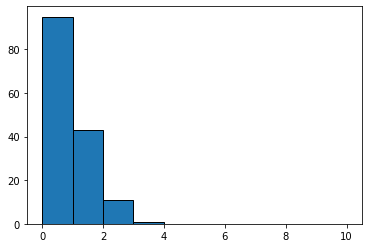

100%|██████████| 22401/22401 [00:16<00:00, 1321.78it/s]


16.94906520843506


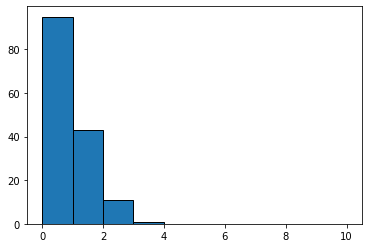

In [25]:
wa = Constant_Weight_Assigner(-0.4)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [04:14<00:00, 88.10it/s] 


254.2788815498352


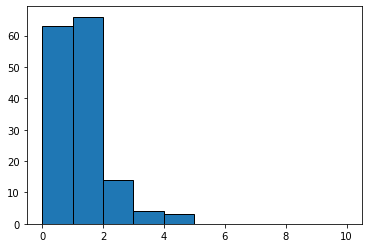

100%|██████████| 22401/22401 [00:17<00:00, 1276.14it/s]


17.555232048034668


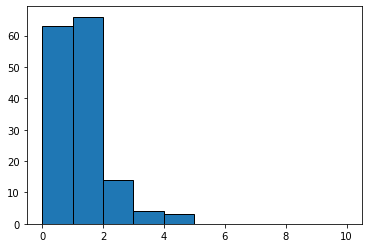

In [19]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=1)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [07:40<00:00, 48.60it/s]


460.9771981239319


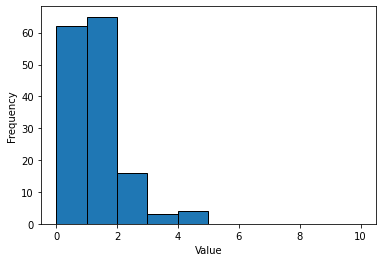

100%|██████████| 22401/22401 [00:20<00:00, 1087.62it/s]


20.59827947616577


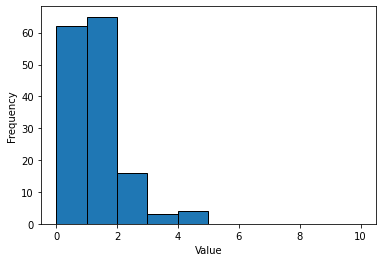

In [8]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=1)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [04:02<00:00, 92.43it/s]


242.36787390708923


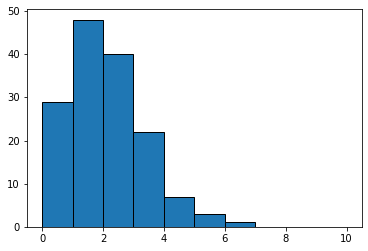

100%|██████████| 22401/22401 [00:19<00:00, 1161.05it/s]


19.295156240463257


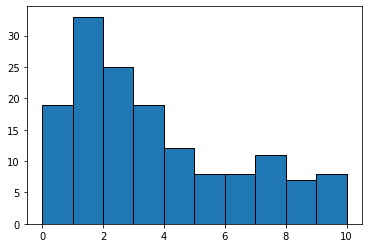

In [21]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=0)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [03:57<00:00, 94.51it/s] 


237.01543879508972


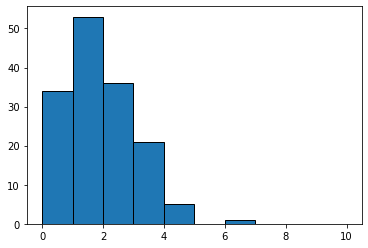

100%|██████████| 22401/22401 [00:18<00:00, 1213.71it/s]


18.458170652389526


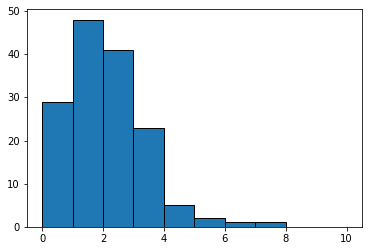

In [22]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=0.2)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [03:49<00:00, 97.45it/s] 


229.8833727836609


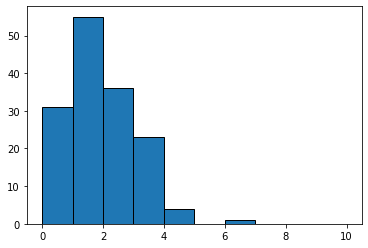

100%|██████████| 22401/22401 [00:16<00:00, 1324.62it/s]


16.9126980304718


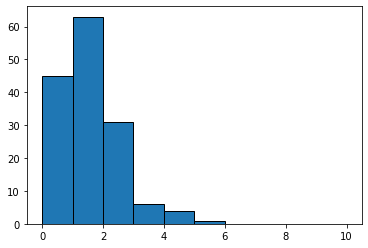

In [23]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=0.4)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

100%|██████████| 22401/22401 [03:44<00:00, 99.85it/s] 


224.3548548221588


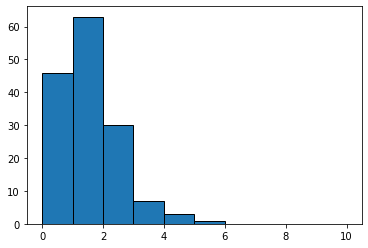

100%|██████████| 22401/22401 [00:16<00:00, 1323.89it/s]


16.922085762023926


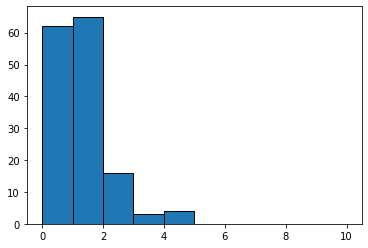

In [24]:
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=0.8)
time_generate_samples("SPGM", wa)
time_generate_samples("TPGM", wa)

In [ ]:
    def generate_samples(self, model:Model, init:np.ndarray, nr_samples:int) -> np.ndarray:
        """
        :param model: Must be a default model; model.theta must be the adjacency matrix.
        :param init: Only interested in its length, which must be the nr of variables.
        :param nr_samples: Number of samples we want to generate.
        :return: Generated samples.
        """
        A = model.theta
        n = nr_samples
        p = A.shape[0]

        print(A.shape)

        B = SIPRVSampler.create_B(A)

        C = self.lambda_true * A
        upper_tri = C[np.triu_indices(p, 1)]
        nonzero_tri = upper_tri[upper_tri != 0]
        print(nonzero_tri)

        Y_lambdas = np.append(np.repeat(self.lambda_true, p), nonzero_tri)
        print(Y_lambdas.shape)

        Y = np.zeros((len(Y_lambdas), n))
        for ii, ylam in enumerate(Y_lambdas):
            Y[ii, :] = np.random.poisson(ylam, (1, n))

        print(B.shape)
        print(Y.shape)
        X = np.matmul(B, Y)  # X is p x n
        X = np.transpose(X)  # X is now n x p

        # Add noise.
        E = np.random.poisson(self.lambda_noise, (n, p))
        X = X + E
        return X

In [4]:
def create_B(adj_matrix: np.ndarray) -> np.ndarray:
    A = adj_matrix
    nrows = A.shape[0]
    ncols = A.shape[1]
    if nrows != ncols:
        raise Exception("create_B: Adjacency matrix is not square.")

    B = np.identity(nrows)
    for ii in range(nrows):
        for jj in range(ii + 1, ncols):
            if A[ii][jj] == 1:
                new_col = np.zeros((nrows, 1))
                new_col[ii] = 1
                new_col[jj] = 1
                B = np.hstack((B, new_col))

    return B

In [5]:
graph = np.ones((10,10))

In [6]:
B = create_B(graph)

In [7]:
B.shape

(10, 55)